Fabio Vaz RA:00282997

Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

#🎓 Aula 9 - Regressão Linear Simples e Múltipla
30 de setembro de 2021


---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---


Faça o que se pede:

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

## Regressão linear simples

### 1) Carregue os dados

A coluna `Access_to_Sanitation` apresenta o percentual da população com acesso a saneamento. A coluna `Life_Expectancy` representa a espectativa de vida.



In [106]:
url = 'https://ibm.box.com/shared/static/q0gt7rsj6z5p3fld163n70i65id3awz3.csv'

# use encoding='latin1' para carregar os dados
df = pd.read_csv(url, encoding='latin1')
df.head()

,Country,Access_to_Sanitation,Life_Expectancy
0,Afghanistan,31.8,60.374463
1,Albania,93.2,77.830463
2,Algeria,87.4,74.808098
3,Angola,51.1,52.266878
4,Argentina,96.1,76.158610


### 2) Use a biblioteca `Seaborn` para plotar a espectativa de vida em função do saneamento da população.

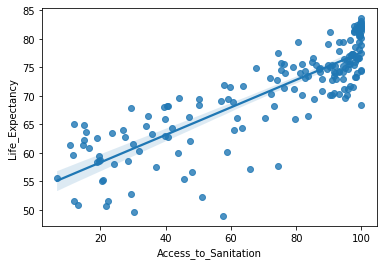

In [107]:
sns.regplot(y = 'Life_Expectancy', x='Access_to_Sanitation', data = df)

### 3) Faça a regressão linear para a espectativa de vida.

In [108]:

X_df1 = df[['Access_to_Sanitation']]
y_df1 = df[['Life_Expectancy']]

LR = LinearRegression().fit(X_df1, y_df1)

### 4) Apresente o coeficiente linear e angular da regressão

In [109]:
LR.intercept_

array([53.51020875])

In [110]:
LR.coef_

array([[0.24121509]])

### 5) Calcule o score R² da regressão.

In [111]:
LR.score(X_df1,y_df1)

0.7162353482844994

## Regressão linear múltipla

### 6) Carregue os dados onde:
* X1 = systolic blood pressure
* X2 = age in years
* X3 = weight in pounds

In [112]:
X1 = 'systolic_blood_pressure'
X2 = 'age_in_years'
X3 = 'weight_in_pounds'

url = 'https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls'

# importe os dados a partir do excel

df = pd.read_excel(url)
df.columns = [X1,X2,X3]
df

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,systolic_blood_pressure,age_in_years,weight_in_pounds
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


### 7) Faça `age in years` e `weight in pounds` as entradas do modelo, armazene em X.

In [113]:
X = df[['systolic_blood_pressure','age_in_years']]

### 8) Faça `systolic blood pressure` a variável a ser prevista, armazene em y.

In [114]:
y = df['weight_in_pounds']

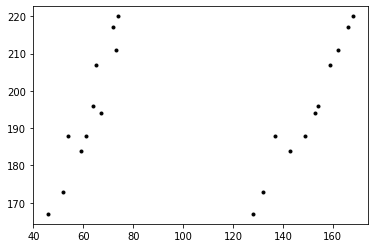

In [115]:
plt.plot(X,y,'k.')

### 9) Faça uma regressão múltipla do modelo.

In [116]:
LM = LinearRegression().fit(X,y)

### 10) Apresente os coeficientes angulares e linear

In [117]:
LM.coef_

array([ 1.34630691, -0.17273689])

In [118]:
LM.intercept_

3.719775726644855

### 11) Calcule o score R² da regressão.

In [119]:
LM.score(X,y)

0.9423437787025833

### 12) Use o método predict em X para calcular $\hat{y}$, atribibua em Yhat .

In [120]:
Yhat = LM.predict(X)
Yhat

array([172.44996974, 186.05018752, 198.13136151, 209.21170236,
       199.9958791 , 217.11680694, 178.83603051, 193.78255521,
       206.55467676, 168.10116344, 214.7696669 ])

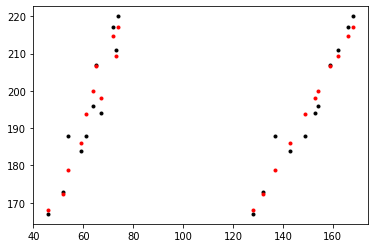

In [121]:
plt.plot(X,y,'k.',X, Yhat,'r.')

**MEAN SQUARED ERROR**

Diferenciando a o erro de cada modelo 

In [121]:
from sklearn.metrics import mean_squared_error

In [126]:
#modelo simples
y_true = y_df1
y_pred = LR.predict(X_df1)
mean_squared_error(y_true, y_pred)

19.922295896494056

In [122]:
#modelo múltiplo 
y_true = y
y_pred = Yhat
mean_squared_error(y_true, y_pred)

15.713941040877755